In [ ]:
from google.colab import files
uploaded=files.upload()

Saving delhi_aqi.csv to delhi_aqi (2).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("delhi_aqi.csv")
df
data1=df.copy()

In [ ]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,25-11-2020 01:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,25-11-2020 02:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,25-11-2020 03:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,25-11-2020 04:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,25-11-2020 05:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [ ]:
df.describe()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [ ]:
df.shape

(18776, 9)

In [ ]:
df.index

RangeIndex(start=0, stop=18776, step=1)

In [ ]:
df.columns

Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

In [ ]:
df.dtypes

,0
date,object
co,float64
no,float64
no2,float64
o3,float64
so2,float64
pm2_5,float64
pm10,float64
nh3,float64


In [ ]:
df.nunique()

,0
date,18776
co,453
no,722
no2,463
o3,752
so2,424
pm2_5,15290
pm10,15965
nh3,510


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    18776 non-null  object 
 1   co      18776 non-null  float64
 2   no      18776 non-null  float64
 3   no2     18776 non-null  float64
 4   o3      18776 non-null  float64
 5   so2     18776 non-null  float64
 6   pm2_5   18776 non-null  float64
 7   pm10    18776 non-null  float64
 8   nh3     18776 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
df.isnull().sum().sum()

0

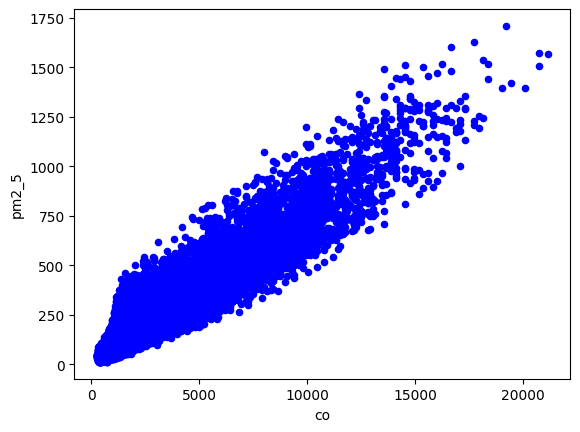

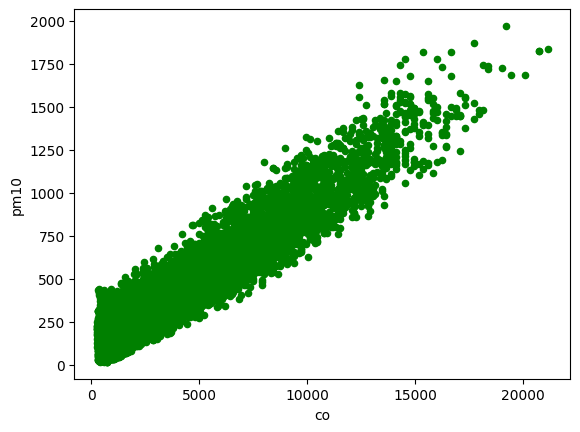

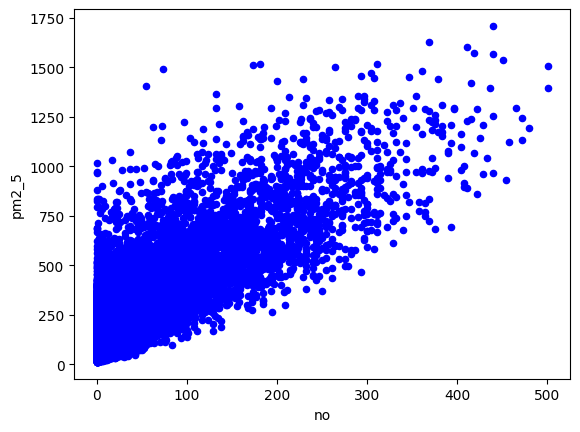

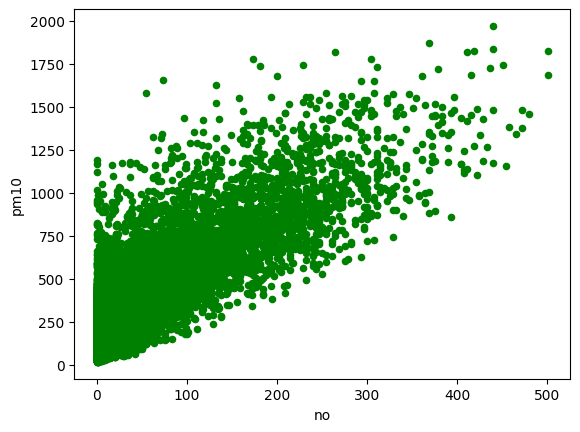

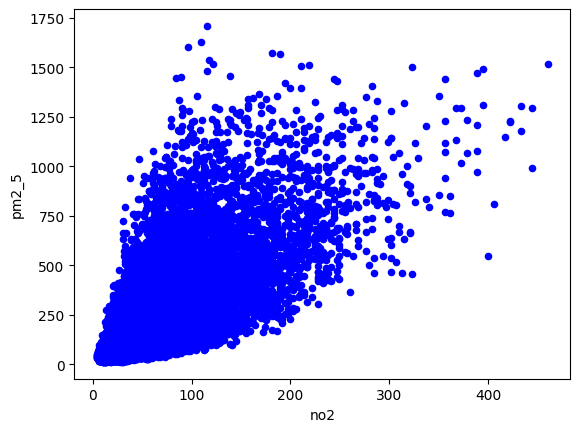

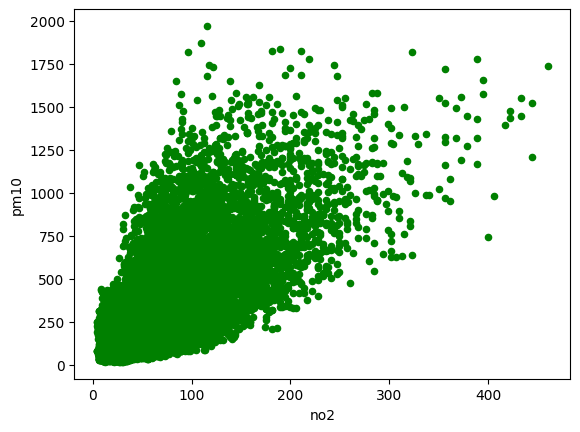

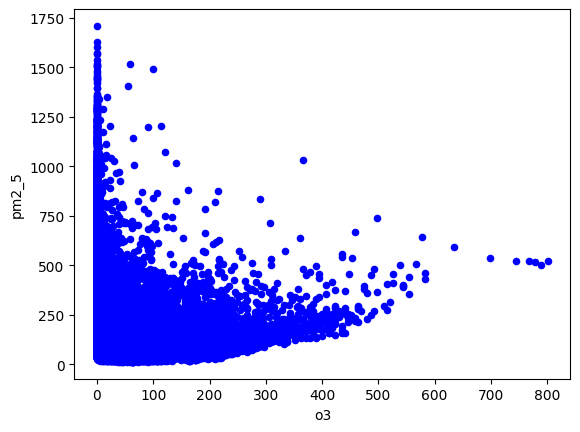

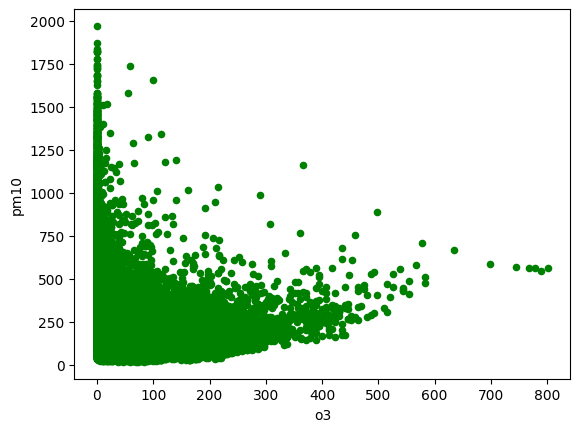

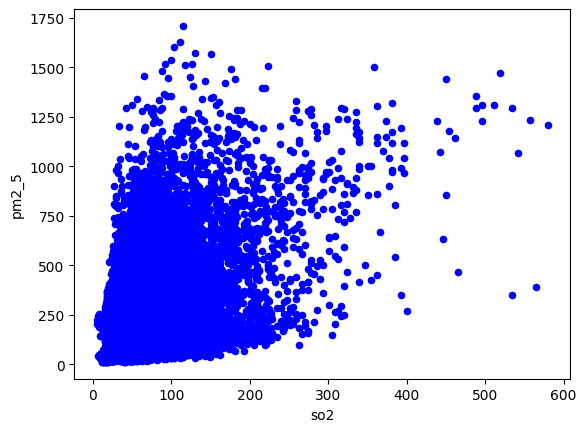

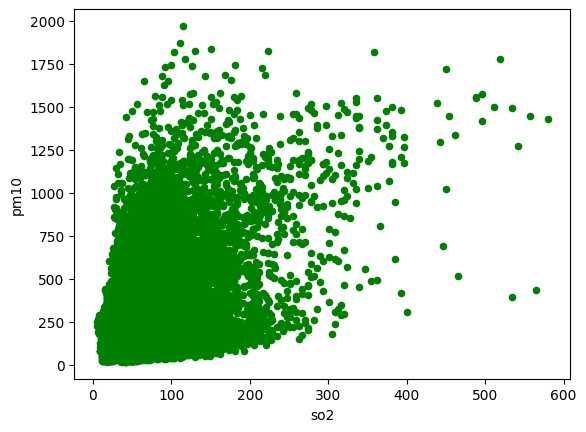

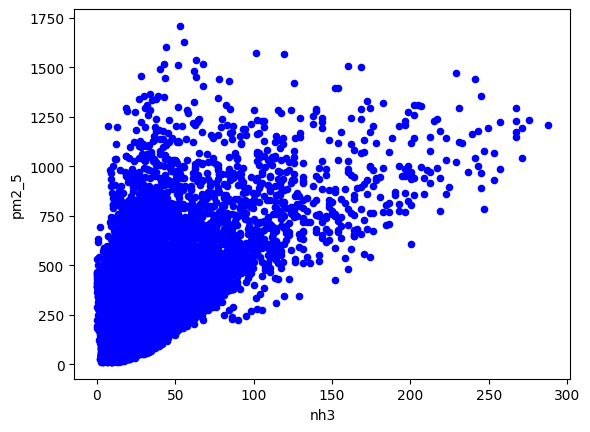

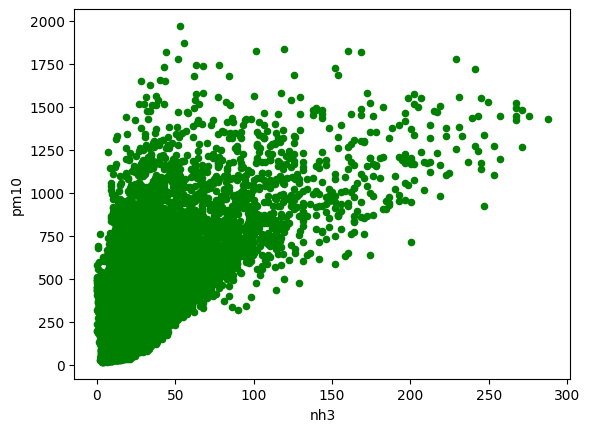

In [ ]:
for i in range(1,6):
  df.plot(kind='scatter',x=df.columns[i],y='pm2_5',color='blue')
  df.plot(kind='scatter',x=df.columns[i],y='pm10',color='green')

for j in range(8,9):
  df.plot(kind='scatter',x=df.columns[j],y='pm2_5',color='blue')
  df.plot(kind='scatter',x=df.columns[j],y='pm10',color='green')

SCATTER PLOT OF NORMAL CO & PM2_5


Text(0, 0.5, 'PM2_5')

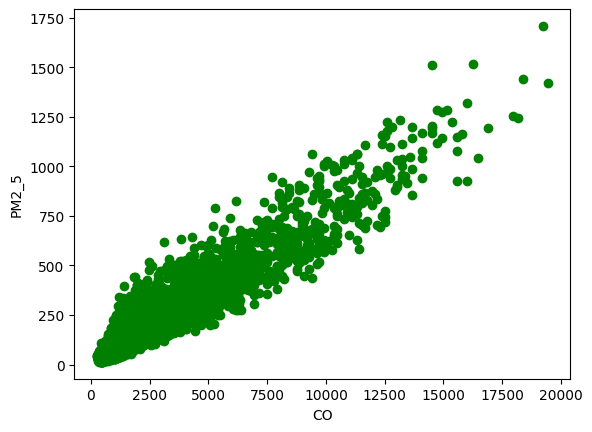

In [ ]:
#RANDOM FOREST
X=df.iloc[:,1:2]
Y=df.iloc[:,6:7].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
print("SCATTER PLOT OF NORMAL CO & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=Y_test_PM25,color='green')
plt.xlabel('CO')
plt.ylabel('PM2_5')

ACTUAL DATA
234.90411608093717
PREDICTION
235.25998519059172


SCATTER PLOT OF PREDICTED CO & PM2_5


Text(0, 0.5, 'PM2_5')

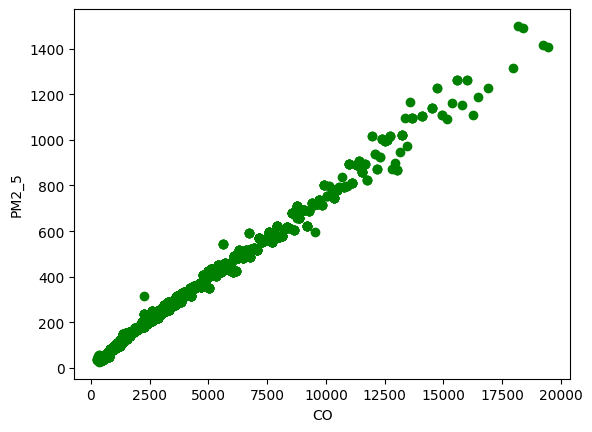

In [ ]:
#RANDOM FOREST
X=df.iloc[:,1:2]
Y=df.iloc[:,6:7].values.reshape(-1)
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
y_pred_PM25=reg.predict(X_test_PM25)
print("ACTUAL DATA")
print(np.mean(Y_test_PM25))
print("PREDICTION")
print(np.mean(y_pred_PM25))
print("\n")
print("SCATTER PLOT OF PREDICTED CO & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=y_pred_PM25,color='green')
plt.xlabel('CO')
plt.ylabel('PM2_5')

SCATTER PLOT OF NORMAL NO & PM2_5


Text(0, 0.5, 'PM2_5')

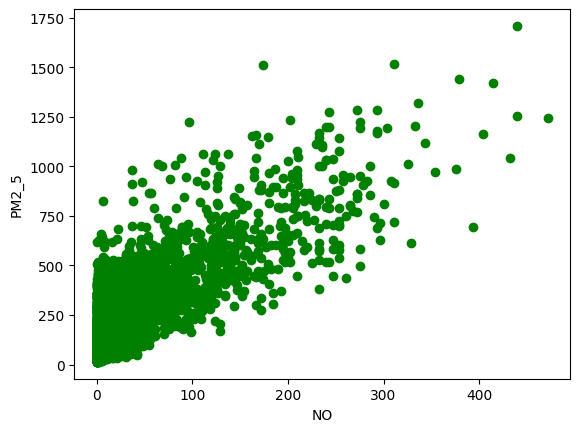

In [ ]:
#RANDOM FOREST
X=df.iloc[:,2:3]
Y=df.iloc[:,6:7].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
print("SCATTER PLOT OF NORMAL NO & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=Y_test_PM25,color='green')
plt.xlabel('NO')
plt.ylabel('PM2_5')

ACTUAL DATA
234.90411608093717
PREDICTION
235.7943613170256


SCATTER PLOT OF PREDICTED NO & PM2_5


Text(0, 0.5, 'PM2_5')

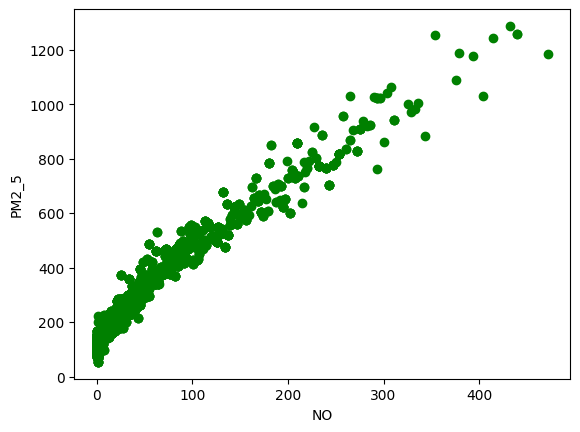

In [ ]:
#RANDOM FOREST
X=df.iloc[:,2:3]
Y=df.iloc[:,6:7].values.reshape(-1)
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
y_pred_PM25=reg.predict(X_test_PM25)
print("ACTUAL DATA")
print(np.mean(Y_test_PM25))
print("PREDICTION")
print(np.mean(y_pred_PM25))
print("\n")
print("SCATTER PLOT OF PREDICTED NO & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=y_pred_PM25,color='green')
plt.xlabel('NO')
plt.ylabel('PM2_5')

SCATTER PLOT OF NORMAL NO2 & PM2_5


Text(0, 0.5, 'PM2_5')

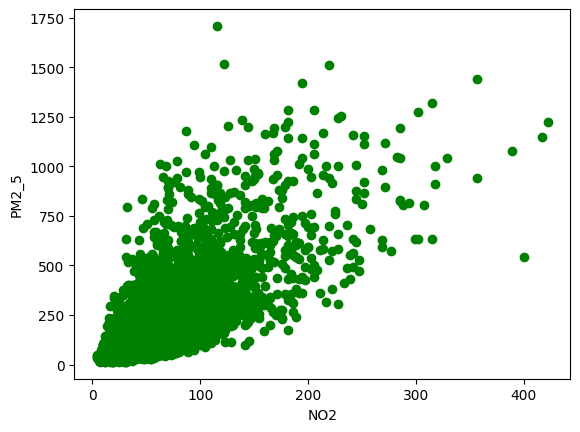

In [ ]:
#RANDOM FOREST
X=df.iloc[:,3:4]
Y=df.iloc[:,6:7].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
print("SCATTER PLOT OF NORMAL NO2 & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=Y_test_PM25,color='green')
plt.xlabel('NO2')
plt.ylabel('PM2_5')

ACTUAL DATA
234.90411608093717
PREDICTION
234.30801946254155


SCATTER PLOT OF PREDICTED NO2 & PM2_5


Text(0, 0.5, 'PM2_5')

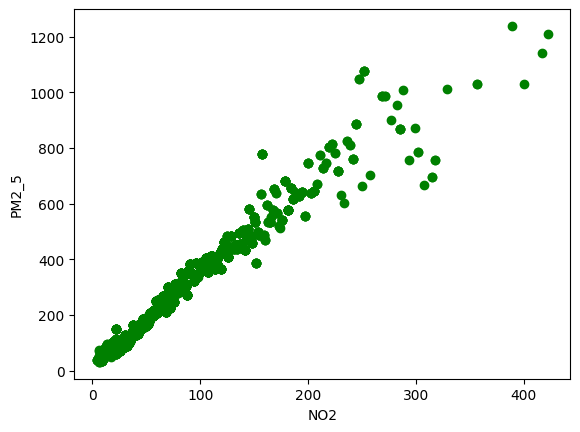

In [ ]:
#RANDOM FOREST
X=df.iloc[:,3:4]
Y=df.iloc[:,6:7].values.reshape(-1)
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
y_pred_PM25=reg.predict(X_test_PM25)
print("ACTUAL DATA")
print(np.mean(Y_test_PM25))
print("PREDICTION")
print(np.mean(y_pred_PM25))
print("\n")
print("SCATTER PLOT OF PREDICTED NO2 & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=y_pred_PM25,color='green')
plt.xlabel('NO2')
plt.ylabel('PM2_5')

SCATTER PLOT OF NORMAL O3 & PM2_5


Text(0, 0.5, 'PM2_5')

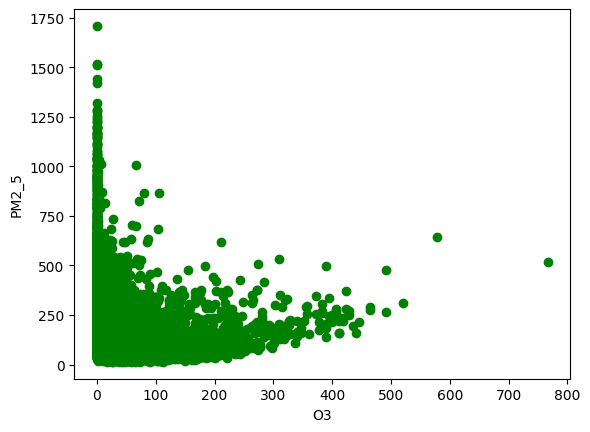

In [ ]:
#RANDOM FOREST
X=df.iloc[:,4:5]
Y=df.iloc[:,6:7].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
print("SCATTER PLOT OF NORMAL O3 & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=Y_test_PM25,color='green')
plt.xlabel('O3')
plt.ylabel('PM2_5')

ACTUAL DATA
234.90411608093717
PREDICTION
239.03126850076833


SCATTER PLOT OF PREDICTED O3 & PM2_5


Text(0, 0.5, 'PM2_5')

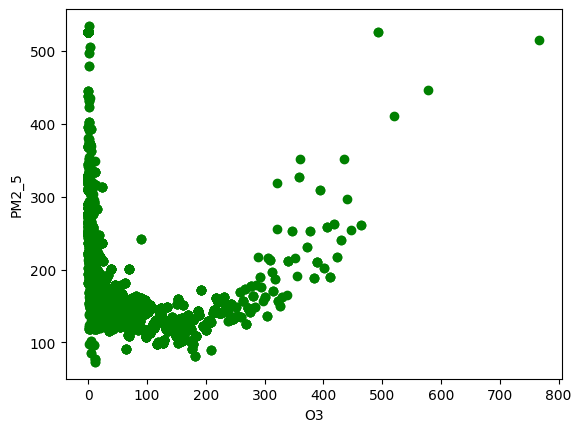

In [ ]:
#RANDOM FOREST
X=df.iloc[:,4:5]
Y=df.iloc[:,6:7].values.reshape(-1)
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
y_pred_PM25=reg.predict(X_test_PM25)
print("ACTUAL DATA")
print(np.mean(Y_test_PM25))
print("PREDICTION")
print(np.mean(y_pred_PM25))
print("\n")
print("SCATTER PLOT OF PREDICTED O3 & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=y_pred_PM25,color='green')
plt.xlabel('O3')
plt.ylabel('PM2_5')

SCATTER PLOT OF NORMAL SO2 & PM2_5


Text(0, 0.5, 'PM2_5')

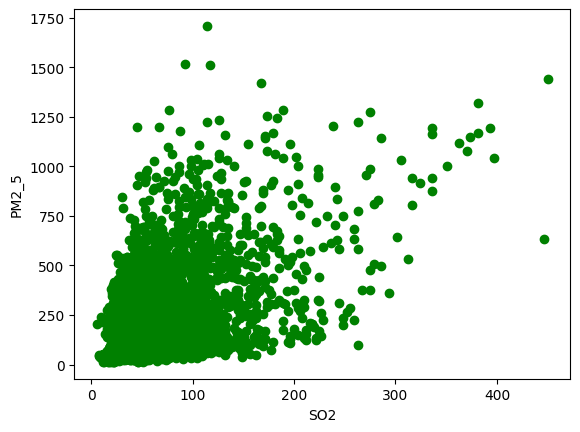

In [ ]:
#RANDOM FOREST
X=df.iloc[:,5:6]
Y=df.iloc[:,6:7].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
print("SCATTER PLOT OF NORMAL SO2 & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=Y_test_PM25,color='green')
plt.xlabel('SO2')
plt.ylabel('PM2_5')

ACTUAL DATA
234.90411608093717
PREDICTION
237.7799121466685


SCATTER PLOT OF PREDICTED SO2 & PM2_5


Text(0, 0.5, 'PM2_5')

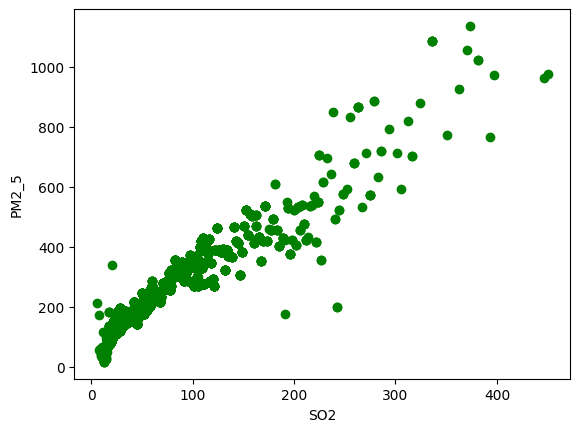

In [ ]:
#RANDOM FOREST
X=df.iloc[:,5:6]
Y=df.iloc[:,6:7].values.reshape(-1)
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
y_pred_PM25=reg.predict(X_test_PM25)
print("ACTUAL DATA")
print(np.mean(Y_test_PM25))
print("PREDICTION")
print(np.mean(y_pred_PM25))
print("\n")
print("SCATTER PLOT OF PREDICTED SO2 & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=y_pred_PM25,color='green')
plt.xlabel('SO2')
plt.ylabel('PM2_5')

SCATTER PLOT OF NORMAL NH3 & PM2_5


Text(0, 0.5, 'PM2_5')

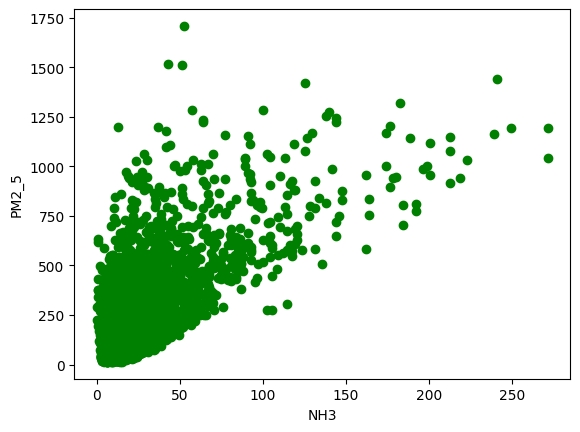

In [ ]:
#RANDOM FOREST
X=df.iloc[:,8:9]
Y=df.iloc[:,6:7].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
print("SCATTER PLOT OF NORMAL NH3 & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=Y_test_PM25,color='green')
plt.xlabel('NH3')
plt.ylabel('PM2_5')

ACTUAL DATA
234.90411608093717
PREDICTION
238.5390282229195


SCATTER PLOT OF PREDICTED NH3 & PM2_5


Text(0, 0.5, 'PM2_5')

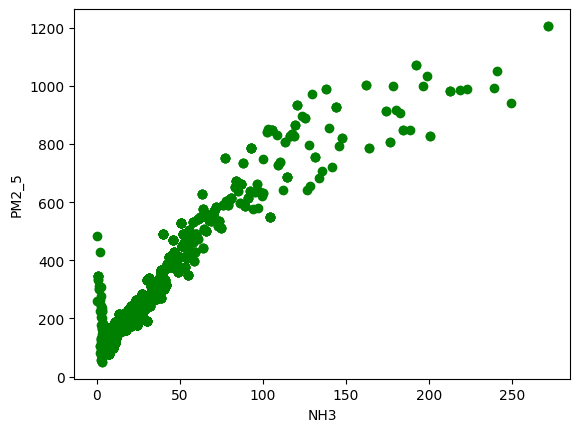

In [ ]:
#RANDOM FOREST
X=df.iloc[:,8:9]
Y=df.iloc[:,6:7].values.reshape(-1)
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM25,Y_train_PM25)
y_pred_PM25=reg.predict(X_test_PM25)
print("ACTUAL DATA")
print(np.mean(Y_test_PM25))
print("PREDICTION")
print(np.mean(y_pred_PM25))
print("\n")
print("SCATTER PLOT OF PREDICTED NH3 & PM2_5")
ax1=plt.scatter(x=X_test_PM25,y=y_pred_PM25,color='green')
plt.xlabel('NH3')
plt.ylabel('PM2_5')

SCATTER PLOT OF NORMAL CO & PM10


Text(0, 0.5, 'PM10')

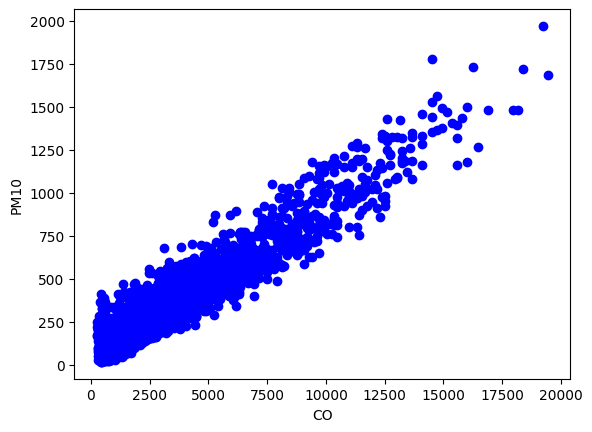

In [ ]:
#RANDOM FOREST
X=df.iloc[:,1:2]
Y=df.iloc[:,7:8].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
print("SCATTER PLOT OF NORMAL CO & PM10")
ax1=plt.scatter(x=X_test_PM10,y=Y_test_PM10,color='blue')
plt.xlabel('CO')
plt.ylabel('PM10')

ACTUAL DATA
296.0754206602769
PREDICTION
296.9142376333175


SCATTER PLOT OF PREDICTED CO & PM10


Text(0, 0.5, 'PM10')

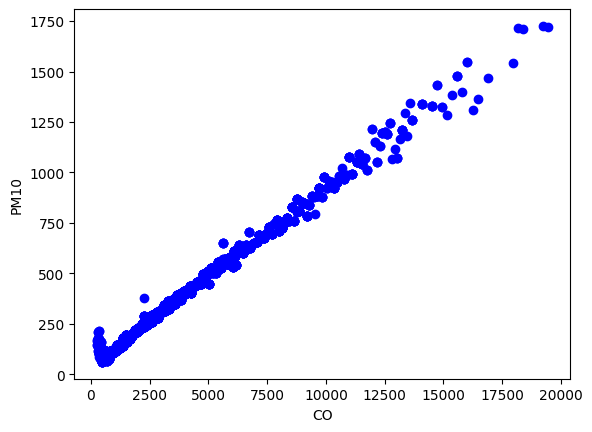

In [ ]:
#RANDOM FOREST
X=df.iloc[:,1:2]
Y=df.iloc[:,7:8].values.reshape(-1)
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
y_pred_PM10=reg.predict(X_test_PM10)
print("ACTUAL DATA")
print(np.mean(Y_test_PM10))
print("PREDICTION")
print(np.mean(y_pred_PM10))
print("\n")
print("SCATTER PLOT OF PREDICTED CO & PM10")
ax1=plt.scatter(x=X_test_PM10,y=y_pred_PM10,color='blue')
plt.xlabel('CO')
plt.ylabel('PM10')

SCATTER PLOT OF NORMAL NO & PM10


Text(0, 0.5, 'PM10')

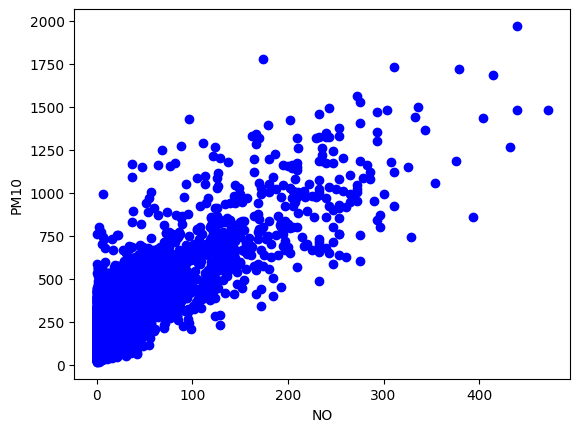

In [ ]:
#RANDOM FOREST
X=df.iloc[:,2:3]
Y=df.iloc[:,7:8].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
print("SCATTER PLOT OF NORMAL NO & PM10")
ax1=plt.scatter(x=X_test_PM10,y=Y_test_PM10,color='blue')
plt.xlabel('NO')
plt.ylabel('PM10')

ACTUAL DATA
296.0754206602769
PREDICTION
298.0507715092895


SCATTER PLOT OF PREDICTED NO & PM10


Text(0, 0.5, 'PM10')

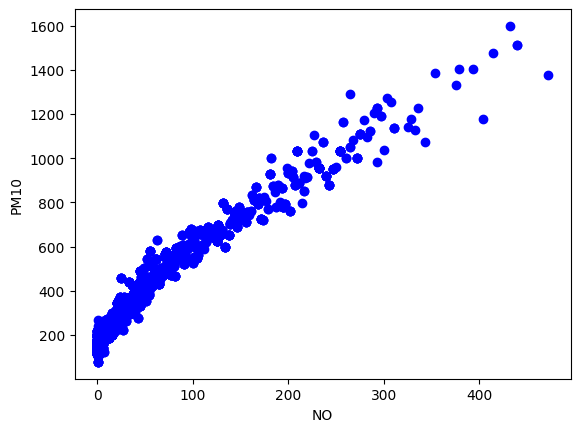

In [ ]:
#RANDOM FOREST
X=df.iloc[:,2:3]
Y=df.iloc[:,7:8].values.reshape(-1)
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
y_pred_PM10=reg.predict(X_test_PM10)
print("ACTUAL DATA")
print(np.mean(Y_test_PM10))
print("PREDICTION")
print(np.mean(y_pred_PM10))
print("\n")
print("SCATTER PLOT OF PREDICTED NO & PM10")
ax1=plt.scatter(x=X_test_PM10,y=y_pred_PM10,color='blue')
plt.xlabel('NO')
plt.ylabel('PM10')

SCATTER PLOT OF NORMAL NO2 & PM10


Text(0, 0.5, 'PM10')

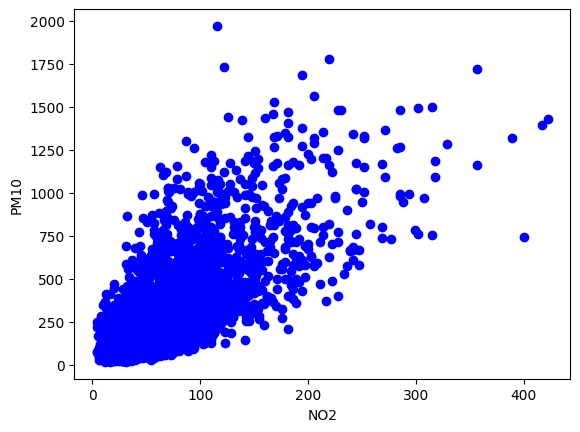

In [ ]:
#RANDOM FOREST
X=df.iloc[:,3:4]
Y=df.iloc[:,7:8].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
print("SCATTER PLOT OF NORMAL NO2 & PM10")
ax1=plt.scatter(x=X_test_PM10,y=Y_test_PM10,color='blue')
plt.xlabel('NO2')
plt.ylabel('PM10')

ACTUAL DATA
296.0754206602769
PREDICTION
295.07204140695114


SCATTER PLOT OF PREDICTED NO2 & PM10


Text(0, 0.5, 'PM10')

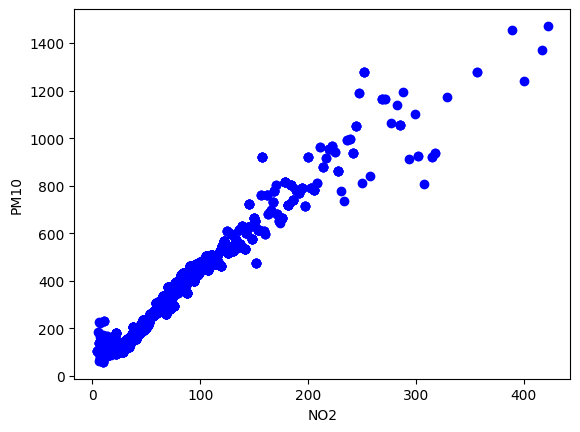

In [ ]:
#RANDOM FOREST
X=df.iloc[:,3:4]
Y=df.iloc[:,7:8].values.reshape(-1)
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
y_pred_PM10=reg.predict(X_test_PM10)
print("ACTUAL DATA")
print(np.mean(Y_test_PM10))
print("PREDICTION")
print(np.mean(y_pred_PM10))
print("\n")
print("SCATTER PLOT OF PREDICTED NO2 & PM10")
ax1=plt.scatter(x=X_test_PM10,y=y_pred_PM10,color='blue')
plt.xlabel('NO2')
plt.ylabel('PM10')

SCATTER PLOT OF NORMAL O3 & PM10


Text(0, 0.5, 'PM10')

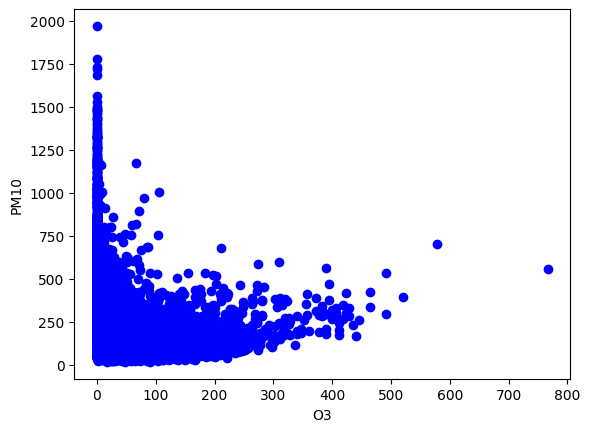

In [ ]:
#RANDOM FOREST
X=df.iloc[:,4:5]
Y=df.iloc[:,7:8].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
print("SCATTER PLOT OF NORMAL O3 & PM10")
ax1=plt.scatter(x=X_test_PM10,y=Y_test_PM10,color='blue')
plt.xlabel('O3')
plt.ylabel('PM10')

ACTUAL DATA
296.0754206602769
PREDICTION
301.3269101479201


SCATTER PLOT OF PREDICTED O3 & PM10


Text(0, 0.5, 'PM10')

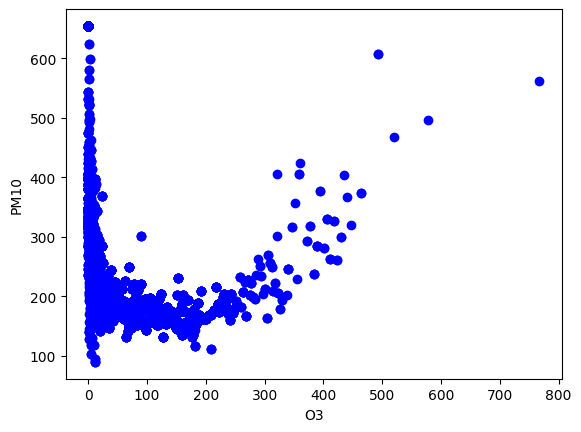

In [ ]:
#RANDOM FOREST
X=df.iloc[:,4:5]
Y=df.iloc[:,7:8].values.reshape(-1)
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
y_pred_PM10=reg.predict(X_test_PM10)
print("ACTUAL DATA")
print(np.mean(Y_test_PM10))
print("PREDICTION")
print(np.mean(y_pred_PM10))
print("\n")
print("SCATTER PLOT OF PREDICTED O3 & PM10")
ax1=plt.scatter(x=X_test_PM10,y=y_pred_PM10,color='blue')
plt.xlabel('O3')
plt.ylabel('PM10')

SCATTER PLOT OF NORMAL SO2 & PM10


Text(0, 0.5, 'PM10')

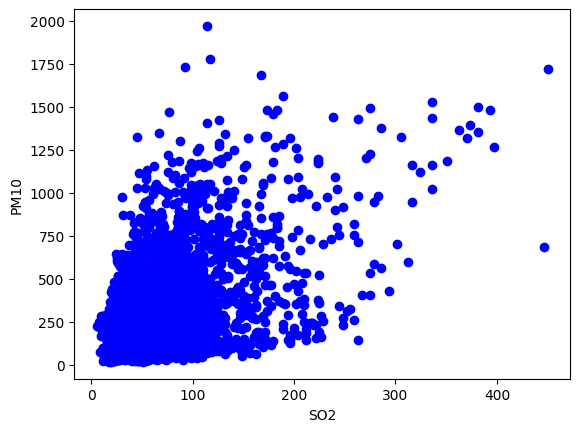

In [ ]:
#RANDOM FOREST
X=df.iloc[:,5:6]
Y=df.iloc[:,7:8].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
print("SCATTER PLOT OF NORMAL SO2 & PM10")
ax1=plt.scatter(x=X_test_PM10,y=Y_test_PM10,color='blue')
plt.xlabel('SO2')
plt.ylabel('PM10')

ACTUAL DATA
296.0754206602769
PREDICTION
299.0882126125238


SCATTER PLOT OF PREDICTED SO2 & PM10


Text(0, 0.5, 'PM10')

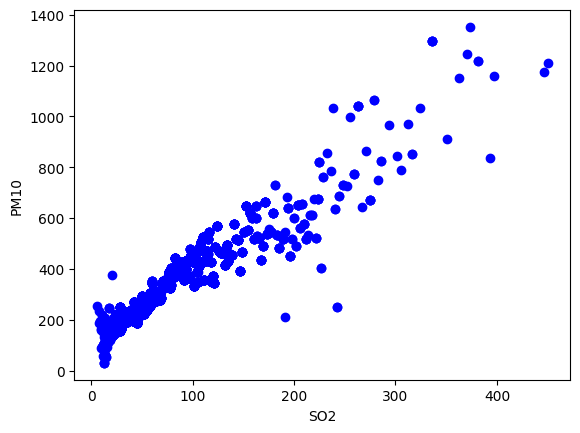

In [ ]:
#RANDOM FOREST
X=df.iloc[:,5:6]
Y=df.iloc[:,7:8].values.reshape(-1)
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
y_pred_PM10=reg.predict(X_test_PM10)
print("ACTUAL DATA")
print(np.mean(Y_test_PM10))
print("PREDICTION")
print(np.mean(y_pred_PM10))
print("\n")
print("SCATTER PLOT OF PREDICTED SO2 & PM10")
ax1=plt.scatter(x=X_test_PM10,y=y_pred_PM10,color='blue')
plt.xlabel('SO2')
plt.ylabel('PM10')

SCATTER PLOT OF NORMAL NH3 & PM10


Text(0, 0.5, 'PM10')

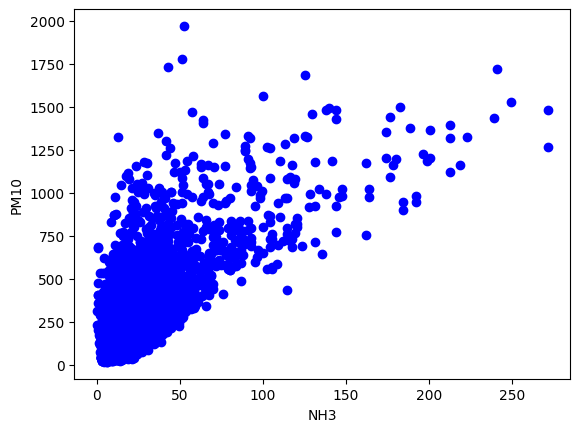

In [ ]:
#RANDOM FOREST
X=df.iloc[:,8:9]
Y=df.iloc[:,7:8].values.reshape(-1)
reg=RandomForestRegressor()
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
print("SCATTER PLOT OF NORMAL NH3 & PM10")
ax1=plt.scatter(x=X_test_PM10,y=Y_test_PM10,color='blue')
plt.xlabel('NH3')
plt.ylabel('PM10')

ACTUAL DATA
296.0754206602769
PREDICTION
299.938607080294


SCATTER PLOT OF PREDICTED NH3 & PM10


Text(0, 0.5, 'PM10')

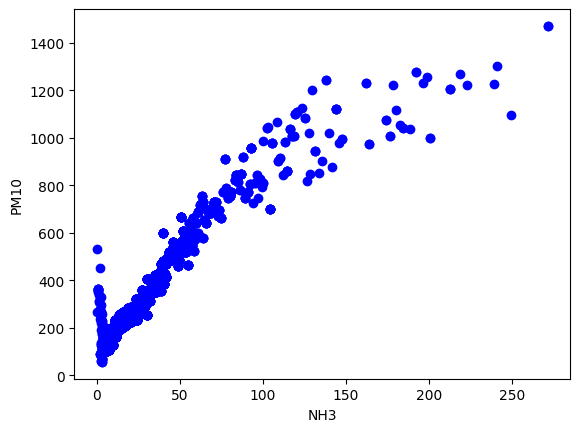

In [ ]:
#RANDOM FOREST
X=df.iloc[:,8:9]
Y=df.iloc[:,7:8].values.reshape(-1)
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
reg.fit(X_train_PM10,Y_train_PM10)
y_pred_PM10=reg.predict(X_test_PM10)
print("ACTUAL DATA")
print(np.mean(Y_test_PM10))
print("PREDICTION")
print(np.mean(y_pred_PM10))
print("\n")
print("SCATTER PLOT OF PREDICTED NH3 & PM10")
ax1=plt.scatter(x=X_test_PM10,y=y_pred_PM10,color='blue')
plt.xlabel('NH3')
plt.ylabel('PM10')

SCATTER PLOT BETWEEN PM2_5 AND DATE


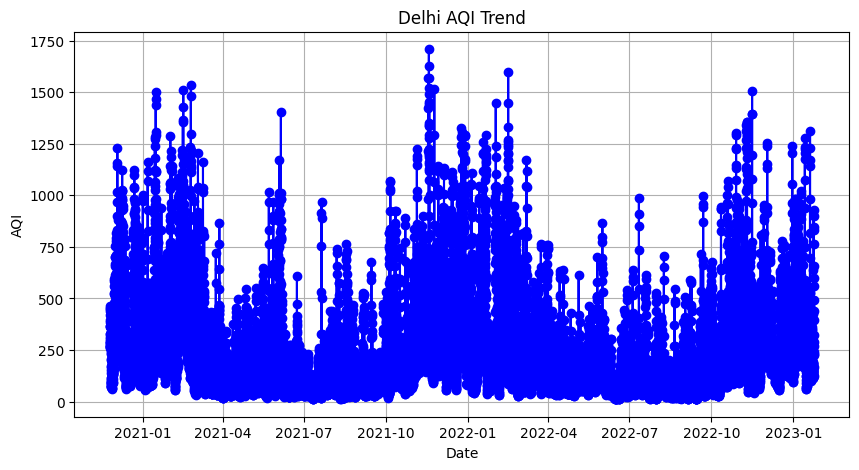

In [ ]:
print("SCATTER PLOT BETWEEN PM2_5 AND DATE")
df['date'] = pd.to_datetime(df['date'])
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df.iloc[:,0:1], df.iloc[:,6:7], marker='o', linestyle='-', color='b')
plt.title('Delhi AQI Trend')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


SCATTER PLOT BETWEEN PM10 AND DATE


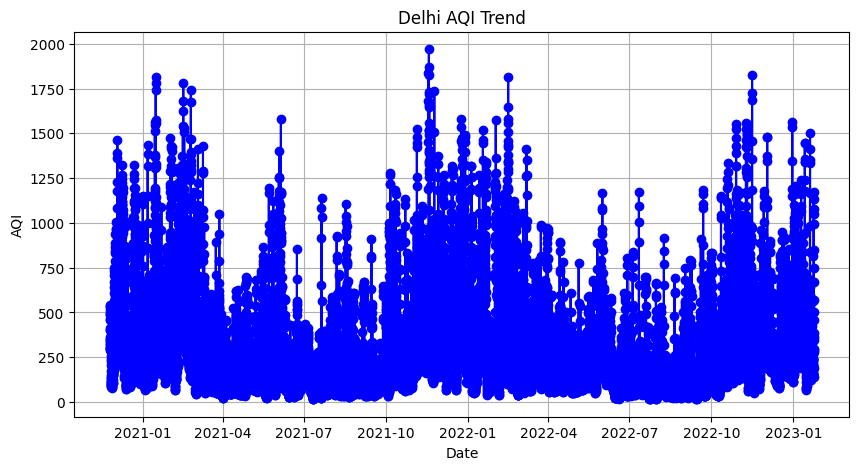

In [ ]:
print("SCATTER PLOT BETWEEN PM10 AND DATE")
df['date'] = pd.to_datetime(df['date'])
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df.iloc[:,0:1], df.iloc[:,7:8], marker='o', linestyle='-', color='b')
plt.title('Delhi AQI Trend')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.grid(True)
plt.show()


In [ ]:
#BUILDING PIPELINES OF STANDARD SCALER AND MODEL FOR VARIOUS REGRESSORS

pipeline_lr=Pipeline([("scaler1",StandardScaler()),("lr_classifier",LinearRegression())])

pipeline_dt=Pipeline([("scaler2",StandardScaler()),("dt_classifier",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scaler3",StandardScaler()),("rf_classifier",RandomForestRegressor())])

pipeline_knn=Pipeline([("scaler4",StandardScaler()),("knn_classifier",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scaler5",StandardScaler()),("xgb_classifier",XGBRegressor())])

#DICTIONARY OF PIPELINES AND MODEL TYPES FOR EASE OF REFERENCE
pipe_dict={0:"Linear Regression",1:"Decision Tree",2:"Random Forest",3:"KNN",4:"XGBoost"}

#LIST OF ALL THE PIPELINES
pipelines=[pipeline_lr,pipeline_dt,pipeline_rf,pipeline_knn,pipeline_xgb]

#FIT THE PIPELINES FOR PM2_5
for pipe in pipelines:
  pipe.fit(X_train_PM25,Y_train_PM25)
  pipe.fit(X_train_PM10,Y_train_PM10)



In [ ]:
#ACCURACY OF MODELS WITH PM2_5
print("ACCURACY OF MODELS WITH PM2_5")

X=df[['co','no','no2','o3','so2','nh3']]
Y=df.iloc[:,6:7].values.reshape(-1,1)
X_train_PM25,X_test_PM25,Y_train_PM25,Y_test_PM25=train_test_split(X,Y,random_state=42,test_size=0.20)
cv_results_rms=[]
cv_results_accuracy=[]
for i,model in enumerate(pipelines):

  model.fit(X_train_PM25,Y_train_PM25)
  y_pred_PM25=model.predict(X_test_PM25)
  cv_results_accuracy.append(1-(np.sqrt(mean_squared_error(Y_test_PM25,y_pred_PM25))/(np.max(Y_test_PM25)-np.min(Y_test_PM25))))

print("MODELS")
print(pipe_dict)
print("ACCURACY")
print(cv_results_accuracy)
print("TEST SET")
print(np.mean(Y_test_PM25))
print("PREDICTED SET")
print(np.mean(y_pred_PM25))

ACCURACY OF MODELS WITH PM2_5
MODELS
{0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGBoost'}
ACCURACY
[0.9631516164898425, 0.9575806059533014, 0.9700103405410205, 0.9634016790427034, 0.9687823205538272]
TEST SET
234.90411608093717
PREDICTED SET
234.812


In [ ]:
#ACCURACY OF NEURAL NETWORK WITH PM2_5
print("ACCURACY OF NEURAL NETWORK WITH PM2_5")
reg=tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[X_train_PM25.shape[1]])])
reg.summary()
reg.compile(optimizer='adam',loss='mae')
losses=reg.fit(X_train_PM25,Y_train_PM25,batch_size=256,epochs=10)
y_pred_PM25=reg.predict(X_test_PM25)
print("\n")
print("ACCURACY")
print(1-(np.sqrt(mean_squared_error(Y_test_PM25,y_pred_PM25))/(np.max(Y_test_PM25)-np.min(Y_test_PM25))))
print("TEST SET")
print(np.mean(Y_test_PM25))
print("PREDICTED SET")
print(np.mean(y_pred_PM25))

ACCURACY OF NEURAL NETWORK WITH PM2_5
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
59/59 [==============================] - 1s 3ms/step - loss: 1919.6349
Epoch 2/10
59/59 [==============================] - 0s 2ms/step - loss: 1731.9385
Epoch 3/10
59/59 [==============================] - 0s 2ms/step - loss: 1543.8989
Epoch 4/10
59/59 [==============================] - 0s 3ms/step - loss: 1355.9713
Epoch 5/10
59/59 [==============================] - 0s 4ms/step - loss: 1168.3328
Epoch 6/10
59/59 [==============================] - 0s 5ms/step - loss: 983.5043
Epoch 7/10
59/59 [===

In [ ]:
#ACCURACY OF MODELS WITH PCA FOR PM2_5
print("ACCURACY OF MODELS WITH PCA FOR PM2_5")
pca=PCA(n_components=5)
X_train_PM25=pca.fit_transform(X_train_PM25)
X_test_PM25=pca.fit_transform(X_test_PM25)
cv_results_accuracy_pca=[]
for i,model in enumerate(pipelines):

  model.fit(X_train_PM25,Y_train_PM25)
  y_pred_PM25=model.predict(X_test_PM25)
  cv_results_accuracy_pca.append(1-(np.sqrt(mean_squared_error(Y_test_PM25,y_pred_PM25))/(np.max(Y_test_PM25)-np.min(Y_test_PM25))))

print("MODELS")
print(pipe_dict)
print("ACCURACY")
print(cv_results_accuracy)
print("TEST SET")
print(np.mean(Y_test_PM25))
print("PREDICTED SET")
print(np.mean(y_pred_PM25))

ACCURACY OF MODELS WITH PCA FOR PM2_5
MODELS
{0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGBoost'}
ACCURACY
[0.9631516164898425, 0.9575806059533014, 0.9700103405410205, 0.9634016790427034, 0.9687823205538272]
TEST SET
234.90411608093717
PREDICTED SET
239.44435


BAR CHART FOR PM2_5




<Axes: xlabel='Model', ylabel='ACCURACY'>

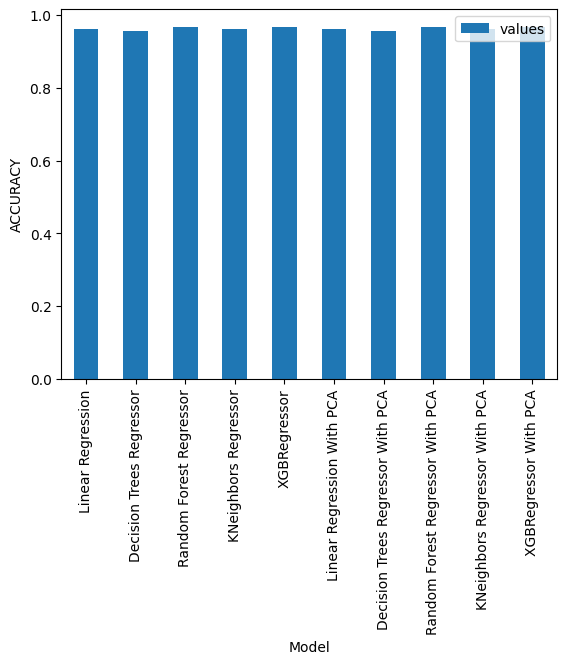

In [ ]:
#BAR CHART FOR PM2_5
print("BAR CHART FOR PM2_5")
print("\n")
d={'Model':['Linear Regression','Decision Trees Regressor','Random Forest Regressor','KNeighbors Regressor','XGBRegressor',
            'Linear Regression With PCA','Decision Trees Regressor With PCA','Random Forest Regressor With PCA','KNeighbors Regressor With PCA',
            'XGBRegressor With PCA'],'values':[0.9607072215072718, 0.9553556375088366, 0.9676427370698574, 0.9610966947140652, 0.9673575492278396
                                               ,0.9607072215072718, 0.9553556375088366, 0.9676427370698574, 0.9610966947140652, 0.9673575492278396]}
dfModel=pd.DataFrame(d)
dfModel.plot.bar(x='Model',y='values',ylabel='ACCURACY')

In [ ]:
#ACCURACY OF MODELS WITH PM10
print("ACCURACY OF MODELS WITH PM10")
X=df[['co','no','no2','o3','so2','nh3']]
Y=df.iloc[:,7:8].values.reshape(-1)
X_train_PM10,X_test_PM10,Y_train_PM10,Y_test_PM10=train_test_split(X,Y,random_state=42,test_size=0.20)
cv_results_rms=[]
cv_results_accuracy=[]
for i,model in enumerate(pipelines):

  model.fit(X_train_PM10,Y_train_PM10)
  y_pred_PM10=model.predict(X_test_PM10)
  cv_results_accuracy.append(1-(np.sqrt(mean_squared_error(Y_test_PM10,y_pred_PM10))/(np.max(Y_test_PM10)-np.min(Y_test_PM10))))

print("\n")
print("MODELS")
print(pipe_dict)
print("ACCURACY")
print(cv_results_accuracy)
print("TEST SET")
print(np.mean(Y_test_PM10))
print("PREDICTED SET")
print(np.mean(y_pred_PM10))

ACCURACY OF MODELS WITH PM10


MODELS
{0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGBoost'}
ACCURACY
[0.9657235505011549, 0.9579171541417245, 0.9703978430317114, 0.9646535109080133, 0.9692924273323897]
TEST SET
296.0754206602769
PREDICTED SET
296.67154


In [ ]:
#ACCURACY OF NEURAL NETWORK WITH PM10
print("ACCURACY OF NEURAL NETWORK WITH PM10")
X=df[['co','no','no2','o3','so2','nh3']]
Y=df.iloc[:,7:8].values.reshape(-1)
reg=tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=[X_train_PM10.shape[1]])])
reg.summary()
reg.compile(optimizer='adam',loss='mae')
losses=reg.fit(X_train_PM10,Y_train_PM10,batch_size=256,epochs=10)
y_pred_PM10=reg.predict(X_test_PM10)
print("\n")
print("ACCURACY")
print(1-(np.sqrt(mean_squared_error(Y_test_PM10,y_pred_PM10))/(np.max(Y_test_PM10)-np.min(Y_test_PM10))))
print("TEST SET")
print(np.mean(Y_test_PM10))
print("PREDICTED SET")
print(np.mean(y_pred_PM10))

ACCURACY OF NEURAL NETWORK WITH PM10
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 7 (28.00 Byte)
Trainable params: 7 (28.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
59/59 [==============================] - 1s 3ms/step - loss: 342.5702
Epoch 2/10
59/59 [==============================] - 0s 3ms/step - loss: 157.4994
Epoch 3/10
59/59 [==============================] - 0s 3ms/step - loss: 70.8717
Epoch 4/10
59/59 [==============================] - 0s 3ms/step - loss: 67.5265
Epoch 5/10
59/59 [==============================] - 0s 2ms/step - loss: 65.4402
Epoch 6/10
59/59 [==============================] - 0s 3ms/step - loss: 63.5222
Epoch 7/10
59/59 [=============

In [ ]:
#ACCURACY OF MODELS WITH PCA FOR PM10
print("ACCURACY OF MODELS WITH PCA FOR PM10")
X=df[['co','no','no2','o3','so2','nh3']]
Y=df.iloc[:,7:8].values.reshape(-1)
pca=PCA(n_components=5)
X_train_PM10=pca.fit_transform(X_train_PM10)
X_test_PM10=pca.fit_transform(X_test_PM10)
cv_results_accuracy_pca=[]
for i,model in enumerate(pipelines):

  model.fit(X_train_PM10,Y_train_PM10)
  y_pred_PM10=model.predict(X_test_PM10)
  cv_results_accuracy_pca.append(1-(np.sqrt(mean_squared_error(Y_test_PM10,y_pred_PM10))/(np.max(Y_test_PM10)-np.min(Y_test_PM10))))

print("MODELS")
print(pipe_dict)
print("ACCURACY")
print(cv_results_accuracy)
print("TEST SET")
print(np.mean(Y_test_PM10))
print("PREDICTED SET")
print(np.mean(y_pred_PM10))

ACCURACY OF MODELS WITH PCA FOR PM10
MODELS
{0: 'Linear Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'KNN', 4: 'XGBoost'}
ACCURACY
[0.9657235505011549, 0.9579171541417245, 0.9703978430317114, 0.9646535109080133, 0.9692924273323897]
TEST SET
296.0754206602769
PREDICTED SET
301.1968


BAR CHART FOR PM10




<Axes: xlabel='Model', ylabel='ACCURACY'>

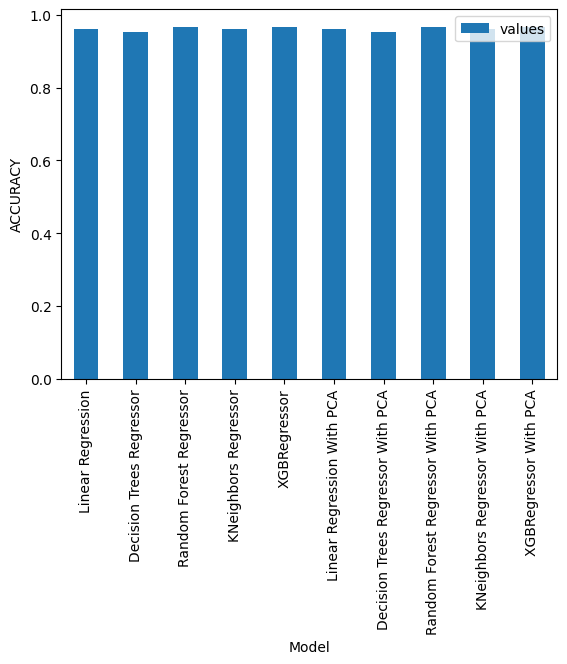

In [ ]:
#BAR CHART FOR PM10
print("BAR CHART FOR PM10")
print("\n")
d={'Model':['Linear Regression','Decision Trees Regressor','Random Forest Regressor','KNeighbors Regressor','XGBRegressor',
            'Linear Regression With PCA','Decision Trees Regressor With PCA','Random Forest Regressor With PCA','KNeighbors Regressor With PCA',
            'XGBRegressor With PCA'],'values':[0.9623239026596964, 0.9542322793984794, 0.9672063281598211, 0.9611807431612849, 0.9662791750124926,0.9623239026596964,
                                               0.9542322793984794, 0.9672063281598211, 0.9611807431612849, 0.9662791750124926]}
dfModel=pd.DataFrame(d)
dfModel.plot.bar(x='Model',y='values',ylabel='ACCURACY')

In [ ]:
print("R^2:",metrics.r2_score(Y_test_PM25,y_pred_PM25))
print("ADJUSTED R^2:",1-(1-metrics.r2_score(Y_test_PM25,y_pred_PM25))*(len(Y_test_PM25)-1)/(len(Y_test_PM25)-X_test_PM25.shape[1]-1))
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(Y_test_PM25,y_pred_PM25))
print("MEAN SQUARED ERROR:",metrics.mean_squared_error(Y_test_PM25,y_pred_PM25))
print("ROOT MEAN SQUARED ERROR:",np.sqrt(metrics.mean_squared_error(Y_test_PM25,y_pred_PM25)))

R^2: 0.9405712184901573
ADJUSTED R^2: 0.9404919801148108
MEAN ABSOLUTE ERROR: 35.791035752037466
MEAN SQUARED ERROR: 2957.0689521448867
ROOT MEAN SQUARED ERROR: 54.378938497775835


In [ ]:
print("R^2:",metrics.r2_score(Y_test_PM10,y_pred_PM10))
print("ADJUSTED R^2:",1-(1-metrics.r2_score(Y_test_PM10,y_pred_PM10))*(len(Y_test_PM10)-1)/(len(Y_test_PM10)-X_test_PM10.shape[1]-1))
print("MEAN ABSOLUTE ERROR:",metrics.mean_absolute_error(Y_test_PM10,y_pred_PM10))
print("MEAN SQUARED ERROR:",metrics.mean_squared_error(Y_test_PM10,y_pred_PM10))
print("ROOT MEAN SQUARED ERROR:",np.sqrt(metrics.mean_squared_error(Y_test_PM10,y_pred_PM10)))

R^2: 0.9443703758547277
ADJUSTED R^2: 0.944296203022534
MEAN ABSOLUTE ERROR: 44.47067276821603
MEAN SQUARED ERROR: 3875.8236537416965
ROOT MEAN SQUARED ERROR: 62.25611338448375


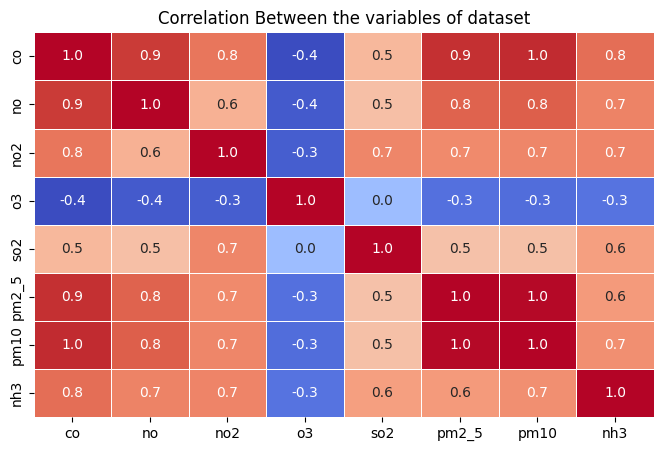

In [ ]:
#HEAT MAP
plt.figure(figsize=(8,5))
sns.heatmap(data1.corr(numeric_only=True),cbar=False,annot=True,fmt="0.1f",cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Between the variables of dataset")
plt.show()

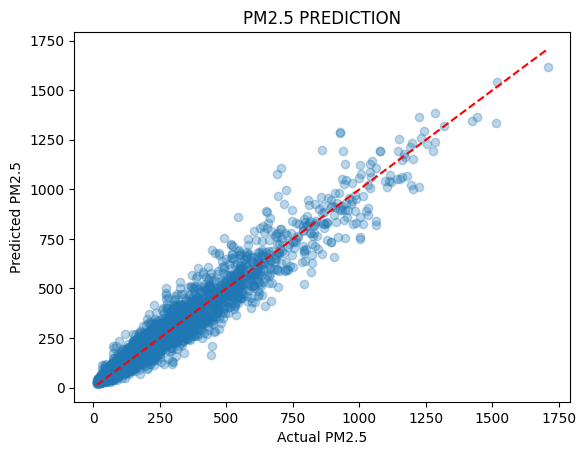

In [ ]:
plt.scatter(Y_test_PM25,y_pred_PM25,alpha=0.3)
plt.plot([Y_test_PM25.min(),Y_test_PM25.max()],[Y_test_PM25.min(),Y_test_PM25.max()],'r--')
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("PM2.5 PREDICTION")
plt.show()

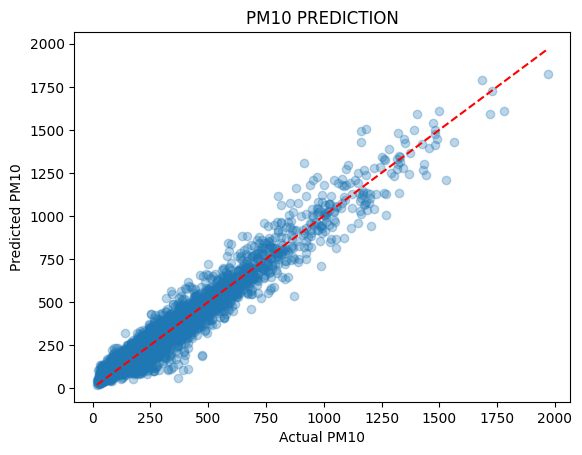

In [ ]:
plt.scatter(Y_test_PM10,y_pred_PM10,alpha=0.3)
plt.plot([Y_test_PM10.min(),Y_test_PM10.max()],[Y_test_PM10.min(),Y_test_PM10.max()],'r--')
plt.xlabel("Actual PM10")
plt.ylabel("Predicted PM10")
plt.title("PM10 PREDICTION")
plt.show()